In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

## 回帰

### データ読み込みと確認

In [2]:
# データセットの読み込み
boston = load_boston() 
# 説明変数
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
# 目的変数
df['PRICE'] = boston.target 

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 可視化

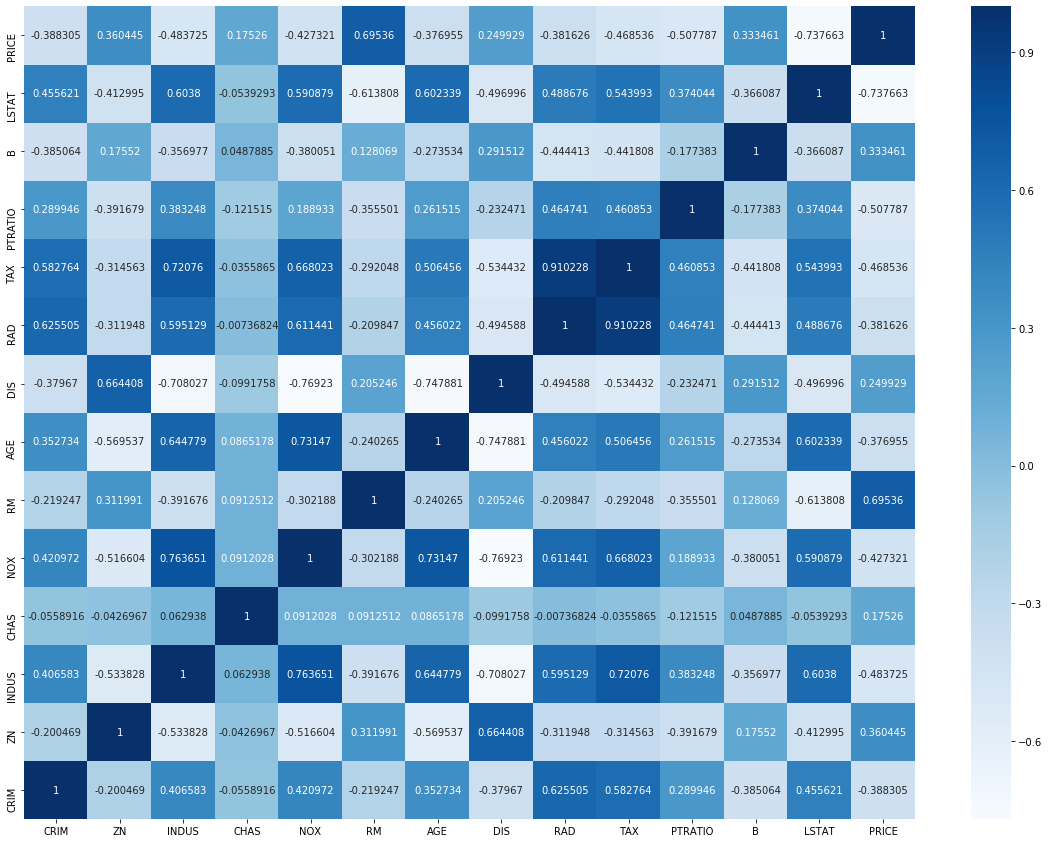

In [3]:
  plt.figure(figsize=(16,12))
  sns.heatmap(df.corr(), annot=True, fmt='g', cmap='Blues')
  plt.tight_layout()
  plt.ylim(0, df.corr().shape[0])
  plt.show()

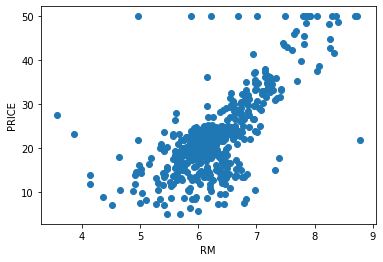

In [4]:
# PRICEと約0.7の相関があるRMを説明変数とする
col1 = 'RM'    # 説明変数　
col2 = 'PRICE' # 目的変数

# 散布図描画
plt.scatter(df[col1], df[col2])
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

### 学習

In [5]:
# 説明変数
X = df[[col1]].values    # 列ベクトル
# 目的変数
y = df[col2].values

# データを学習データと現在データ(テストデータ)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2020)

In [6]:
# 線形回帰モデル
model = LinearRegression()

# 学習
model.fit(X_train, y_train) 
print('傾き: ', model.coef_[0]) 
print('切片: ', model.intercept_)

# 保存
pickle.dump(model, open('model.pickle', 'wb'))

傾き:  9.111633982992297
切片:  -34.47557789280662


### 推論

In [7]:
# モデル読込
model = pickle.load(open('model.pickle', 'rb'))

# 予測
pred = model.predict(X_test)

### 結果

In [8]:
# 結果
y_test_df = pd.DataFrame(y_test, columns=['fact']) # 実測値
result_df = pd.DataFrame(pred, columns=['pred'])   # 予測値
result_df = pd.concat([result_df, y_test_df], axis=1) # 結合

result_df # 左予測値、右実測値から精度はそこまで高くないことがわかる

,pred,fact
0,27.957338,27.5
1,22.253455,20.5
2,18.845704,6.3
3,28.130459,24.8
4,23.620200,23.1
5,20.850264,14.5
6,25.114508,16.5
7,32.157801,15.0
8,22.226120,10.2
9,23.064391,22.3


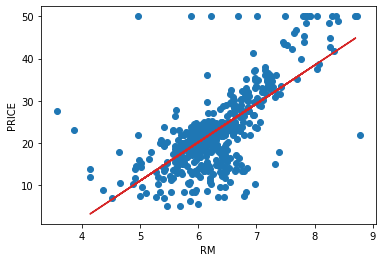

In [9]:
# 散布図描画
plt.scatter(df[col1], df[col2])
plt.plot(X_test, result_df['pred'], color='tab:red') # 追加
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()